In [30]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

#### Nashville park trails and zipcode data and look at the first few rows
- geopandas reads files with the `read_file()` method
- The zipcode data was downloaded from https://data.nashville.gov/General-Government/Zip-Codes/u7r5-bpku
- The park trail data was downloaded from https://data.nashville.gov/maps/76312d5c84194025b001b340c326ac15

In [24]:
park_trails = gpd.read_file('../data/Park_Trails_.geojson')
print(park_trails.crs)
park_trails.head( )

EPSG:4326


,GlobalID,TrailName,TrailType,Description,Mileage,Difficulty,SurfaceMaterial,YearBuilt,PARK_ID,OBJECTID,geometry
0,8be583ca-e2b5-4b84-898e-e1f6dac6d70f,Access Trail,Mountain Bike Trail,,0.108945,,Unpaved,NaN,PARK_172,1,"LINESTRING (-86.62429 36.10385, -86.62431 36.1..."
1,d7dda5a8-d7ce-4ff2-8b4f-8cc330c56a4f,East/West Connector,Mountain Bike Trail,,0.194277,,Unpaved,NaN,PARK_172,2,"LINESTRING (-86.62397 36.09706, -86.62403 36.0..."
2,94402a26-c5b4-436e-9dc9-c358ee680896,Cane Ridge Mountain Bike Trail,Mountain Bike Trail,,0.005279,,Unpaved,NaN,PARK_47,3,"LINESTRING (-86.61937 35.99142, -86.61928 35.9..."
3,38ef5ccb-3509-4f7c-aba8-b0c3f6d80c47,Cane Ridge Mountain Bike Trail,Mountain Bike Trail,,0.002665,,Unpaved,NaN,PARK_47,4,"LINESTRING (-86.61928 35.99140, -86.61923 35.9..."
4,3da17cbb-3094-4077-94a9-a21d09ad6928,Cane Ridge Mountain Bike Trail,Mountain Bike Trail,,0.023682,,Unpaved,NaN,PARK_47,5,"LINESTRING (-86.61923 35.99139, -86.61920 35.9..."


In [4]:
type(park_trails)

geopandas.geodataframe.GeoDataFrame

#### Now let's look at the difference between calling the first geometry variable.....


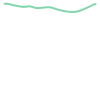

In [5]:
park_trails.loc[0, 'geometry']

#### ...and printing it


In [6]:
print(park_trails.loc[0, 'geometry'])

LINESTRING (-86.6242889592117 36.1038464054419, -86.624306518818 36.1038483324927, -86.6243234102055 36.1038479052695, -86.6243344264063 36.1038457816203, -86.6243461524692 36.1038414200387, -86.6243899592372 36.1038179052425, -86.6245279255229 36.1037537358121, -86.6245898686056 36.1037278233664, -86.6246536415266 36.1037072234293, -86.6246832864997 36.1037004923841, -86.6247119097375 36.103696025215, -86.62474801095 36.1036931352836, -86.624786332261 36.1036927835416, -86.6248270236013 36.1036949692104, -86.6248703682914 36.1036997061412, -86.6249158745199 36.1037068770101, -86.6249651397658 36.1037166745204, -86.625083978409 36.1037460647086, -86.6251689573331 36.1037742783995, -86.625200409677 36.1037826954719, -86.6252330603668 36.1037873011476, -86.6252697859961 36.1037881075497, -86.6253112081615 36.1037853529925, -86.6254351390962 36.1037718536768, -86.6254737719061 36.1037712819931, -86.6255077692185 36.103774405226, -86.6255352690337 36.1037805823183, -86.6256034623754 36.103

#### Plotting a GeoDataFrame is as easy as calling the GeoPandas .plot() function


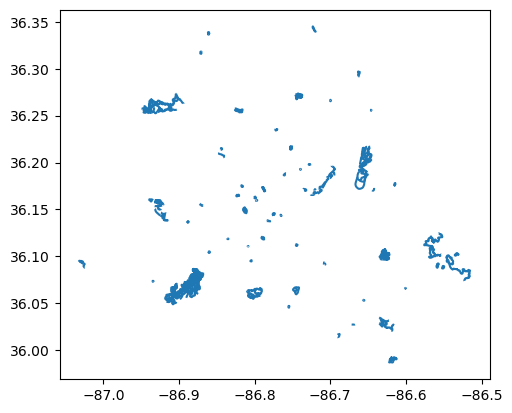

In [7]:
park_trails.plot();

#### Add information and styling 
- set the `column =` to a column in the GeoDataFrame to color by
- change the [colormap](https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html) 
- pass in keywords to tweak the legend created by [`matplotib`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html)


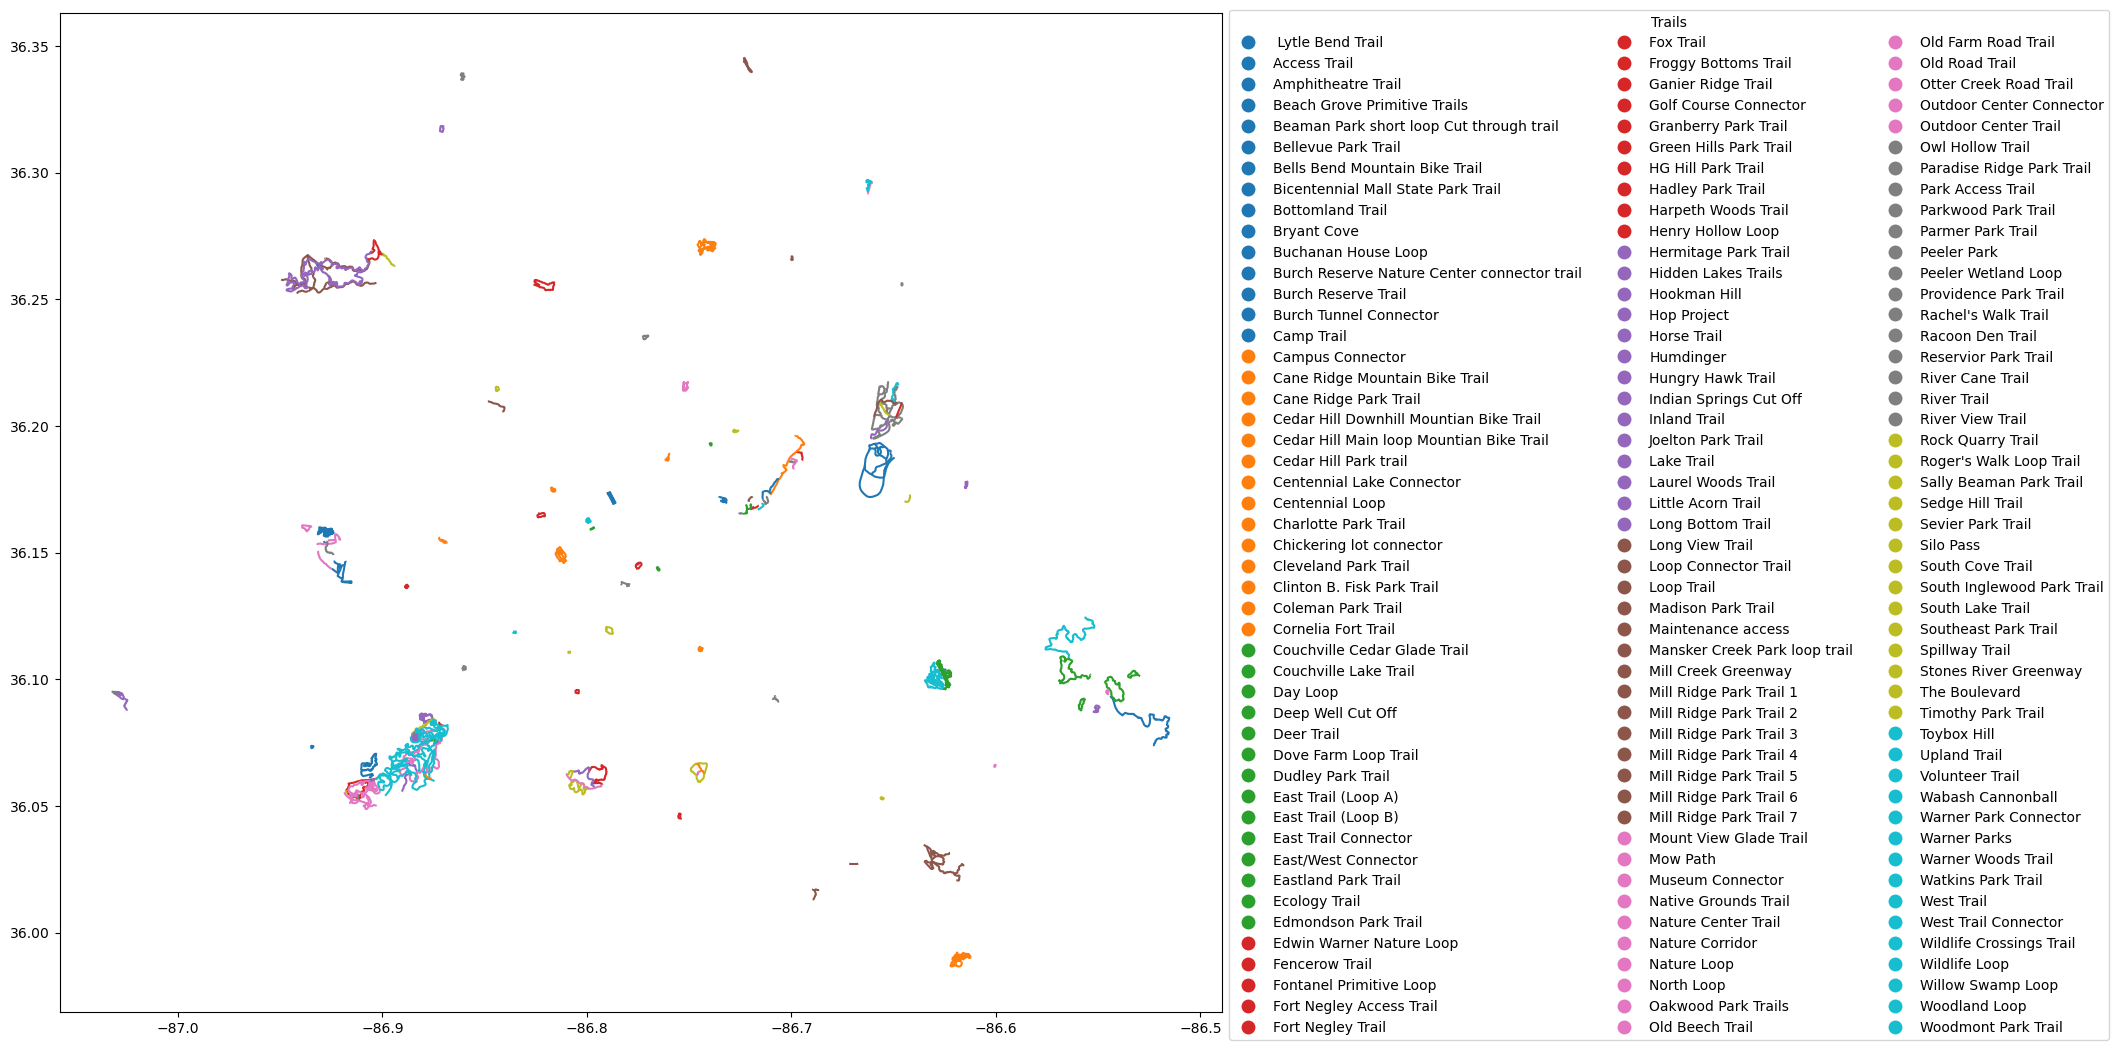

In [55]:
#geopandas will take care of legend styling if you pass a dict of keywords

leg_kwds = {'title': 'Trails', 'loc': 'upper left', 
            'bbox_to_anchor': (1, 1.01), 'ncol': 3}

park_trails.plot(column = 'TrailName', figsize=(15, 15),
              legend = True, legend_kwds = leg_kwds)
plt.show()

In [41]:
zipcodes = gpd.read_file('../data/zipcodes.geojson')
print(zipcodes.crs)
zipcodes.head( )

EPSG:4326


,zip,objectid,po_name,shape_stlength,shape_starea,geometry
0,37115,1,MADISON,178783.02488886821,596553400.57885742,"MULTIPOLYGON (((-86.68725 36.31821, -86.68722 ..."
1,37216,3,NASHVILLE,75820.997821400058,188884682.28344727,"MULTIPOLYGON (((-86.73451 36.23774, -86.73425 ..."
2,37204,9,NASHVILLE,93180.292250425613,200664795.51708984,"MULTIPOLYGON (((-86.77914 36.13424, -86.77923 ..."
3,37027,11,BRENTWOOD,159760.6942933173,174978422.04101562,"MULTIPOLYGON (((-86.81258 36.06319, -86.81263 ..."
4,37064,18,FRANKLIN,28995.828320601937,46969608.005737305,"MULTIPOLYGON (((-87.02197 36.01200, -87.02140 ..."


In [27]:
parks.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   GlobalID         64 non-null     object  
 1   FacilityName     64 non-null     object  
 2   FacilityType     64 non-null     object  
 3   NameAbbrev       39 non-null     object  
 4   Address          64 non-null     object  
 5   City             52 non-null     object  
 6   State            64 non-null     object  
 7   ZipCode          54 non-null     object  
 8   PhoneNumber      64 non-null     object  
 9   Email            5 non-null      object  
 10  Website          64 non-null     object  
 11  Description      51 non-null     object  
 12  YearEstablished  38 non-null     float64 
 13  OBJECTID         64 non-null     int64   
 14  geometry         64 non-null     geometry
dtypes: float64(1), geometry(1), int64(1), object(12)
memory usage: 7.6+ KB


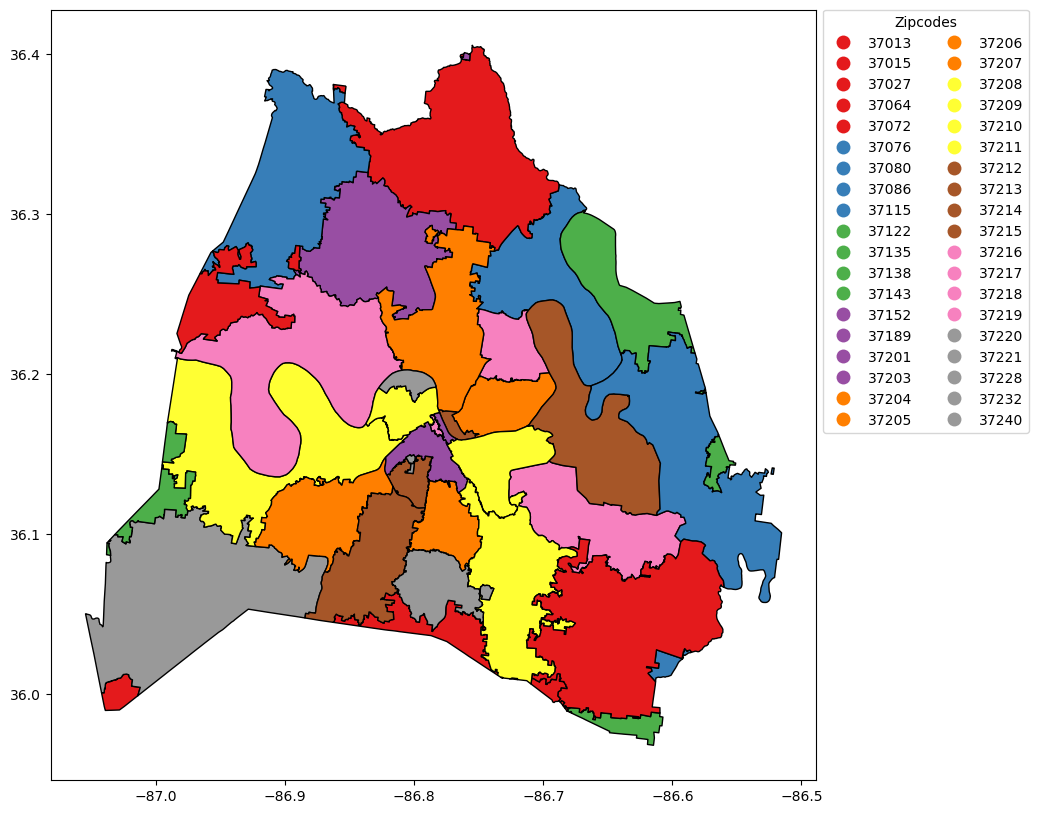

In [73]:
leg_kwds = {'title': 'Zipcodes', 'loc': 'upper left', 
            'bbox_to_anchor': (1, 1.01), 'ncol': 2}

zipcodes.plot(column = 'zip', figsize=(10, 10),
              edgecolor = 'black',
              legend = True, legend_kwds = leg_kwds, 
              cmap = 'Set1')
plt.show()

- you want the CRS for the parks to match the CRS in the zipcodes GeoDataFrame 


In [23]:
parks.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

#### The `GeoDataFrame()` constructor needs 3 parameters:
 - a DataFrame
 - a coordinate reference system
 - a geometry 

In [32]:
parks_geo = gpd.GeoDataFrame(parks, 
                           crs = park_trails.crs, 
                           geometry = parks.geometry)

In [33]:
type(parks_geo)

geopandas.geodataframe.GeoDataFrame

#### Now you are ready to combine parks and zipcodes with a spatial join
- first a little clean up for the zipcodes
    - just keep the zip, po_name, and geometry columns
- then construct the join 
    - keep in mind that you want to find the **bus stops within a zip code polygon**
    - the geometry for the new (combined) GeoDataFrame comes from the left GeoDataFrame


In [34]:
zipcodes = zipcodes[['zip', 'po_name', 'geometry']]

In [45]:
parks_by_zip = gpd.sjoin(park_trails, zipcodes, predicate = 'within')

In [46]:
parks_by_zip.head()

,GlobalID,TrailName,TrailType,Description,Mileage,Difficulty,SurfaceMaterial,YearBuilt,PARK_ID,OBJECTID,geometry,index_right,zip,objectid,po_name,shape_stlength,shape_starea
0,8be583ca-e2b5-4b84-898e-e1f6dac6d70f,Access Trail,Mountain Bike Trail,,0.108945,,Unpaved,NaN,PARK_172,1,"LINESTRING (-86.62429 36.10385, -86.62431 36.1...",17,37217,56,NASHVILLE,179866.56847992647,517579208.08972168
1,d7dda5a8-d7ce-4ff2-8b4f-8cc330c56a4f,East/West Connector,Mountain Bike Trail,,0.194277,,Unpaved,NaN,PARK_172,2,"LINESTRING (-86.62397 36.09706, -86.62403 36.0...",17,37217,56,NASHVILLE,179866.56847992647,517579208.08972168
2,94402a26-c5b4-436e-9dc9-c358ee680896,Cane Ridge Mountain Bike Trail,Mountain Bike Trail,,0.005279,,Unpaved,NaN,PARK_47,3,"LINESTRING (-86.61937 35.99142, -86.61928 35.9...",51,37013,34,ANTIOCH,349164.88029162859,1150567551.5894165
3,38ef5ccb-3509-4f7c-aba8-b0c3f6d80c47,Cane Ridge Mountain Bike Trail,Mountain Bike Trail,,0.002665,,Unpaved,NaN,PARK_47,4,"LINESTRING (-86.61928 35.99140, -86.61923 35.9...",51,37013,34,ANTIOCH,349164.88029162859,1150567551.5894165
4,3da17cbb-3094-4077-94a9-a21d09ad6928,Cane Ridge Mountain Bike Trail,Mountain Bike Trail,,0.023682,,Unpaved,NaN,PARK_47,5,"LINESTRING (-86.61923 35.99139, -86.61920 35.9...",51,37013,34,ANTIOCH,349164.88029162859,1150567551.5894165


#### Now that the data is joined spatially you can count the bus stops by zip code  and see how many stops are within each polygon 
- using the `value_counts()` method


In [47]:
parks_by_zip['zip'].value_counts()

zip
37221    80
37115    21
37013    19
37217    16
37076    15
37206    14
37218    11
37220    10
37080     9
37203     7
37207     5
37138     5
37215     3
37209     3
37211     2
37208     2
37204     2
37072     1
37189     1
37210     1
37027     1
37216     1
37205     1
37214     1
Name: count, dtype: int64

In [48]:
trails_in_37221 = parks_by_zip.loc[parks_by_zip['zip'] == '37221']
trails_in_37221.shape

(80, 17)

In [58]:
polygon37221 = zipcodes.loc[zipcodes['zip'] == '37221']
polygon37221.shape

(1, 6)

#### Now plot these two together
- first plot the polygons for 37207 and make them light green
- next plot the points for the bus stops and color them by route

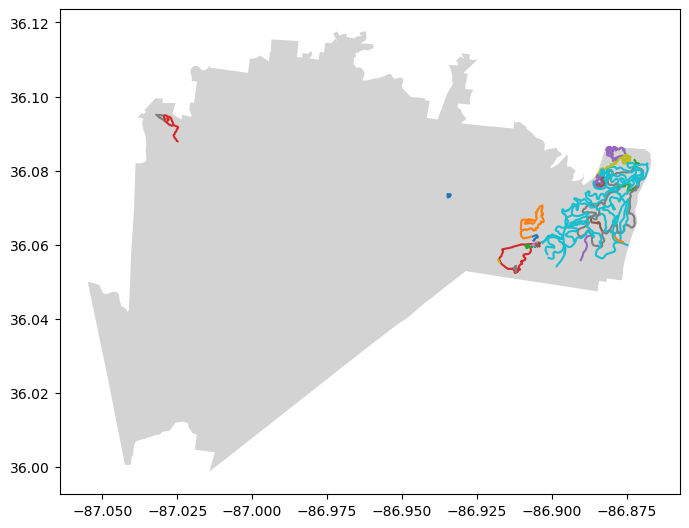

In [117]:
#fig, ax = matplotlib.subplots()
ax = polygon37221.plot(figsize = (8, 10), color = 'lightgray')
trails_in_37221.plot( ax = ax, column = 'TrailName');
plt.show();

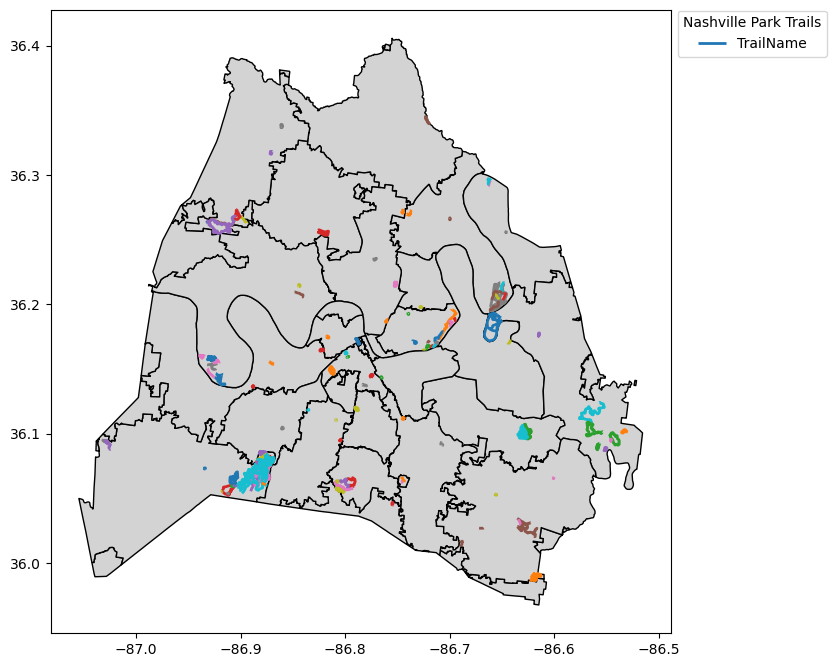

In [118]:
#fig, ax = matplotlib.subplots()


ax = zipcodes.plot(figsize = (8, 10), color = 'lightgray',edgecolor = 'black')
parks_by_zip.plot( ax = ax, column = 'TrailName', linewidth = 2)
plt.legend(title= 'Nashville Park Trails', labels= ['TrailName'] ,bbox_to_anchor=(1, 1.01), ncol=3, loc='upper left')
plt.show();